# Malaria Detection Using Deep Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Download the data set from https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets
data_dir = 'C:\\Users\\m10sa\Desktop\\cell_images'
os.listdir(data_dir)

['test', 'train']

In [3]:
train_path = data_dir + '\\train\\'
test_path = data_dir + '\\test\\'

In [4]:
train_path

'C:\\Users\\m10sa\\Desktop\\cell_images\\train\\'

In [5]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path + 'parasitized')

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [7]:
os.listdir(train_path+'parasitized')[1]

'C100P61ThinF_IMG_20150918_144104_cell_163.png'

In [8]:
para_cell = 'C:\\Users\\m10sa\\Desktop\\cell_images\\train\\parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png'

In [9]:
from matplotlib.image import imread

In [10]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

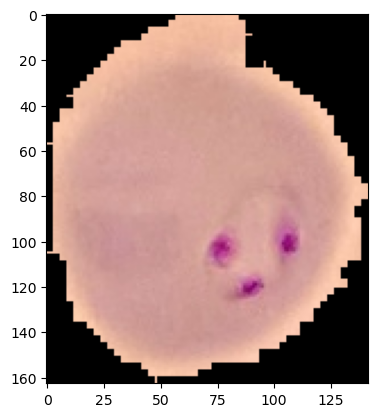

In [11]:
plt.imshow(imread(para_cell));

In [12]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [13]:
uninfected_cell = train_path+'uninfected\\'+os.listdir(train_path+'uninfected')[0]

In [14]:
imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

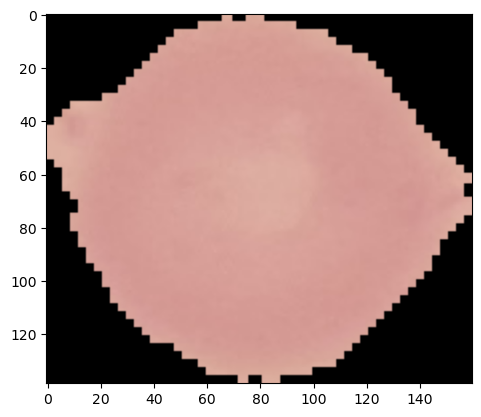

In [15]:
plt.imshow(imread(uninfected_cell));

In [16]:
len(os.listdir(train_path+'parasitized'))

12480

In [17]:
len(os.listdir(train_path+'uninfected'))

12480

In [18]:
dim1=[]
dim2=[]

for image_name in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_name)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [19]:
dims_df = pd.DataFrame({'dim1':dim1, 'dim2':dim2})
dims_df

,dim1,dim2
0,118,118
1,172,145
2,130,151
3,163,145
4,172,139
...,...,...
1295,130,142
1296,118,94
1297,109,136
1298,154,133


In [20]:
dims_df.describe()

,dim1,dim2
count,1300.000000,1300.00000
mean,130.925385,130.75000
std,18.718402,18.93341
min,58.000000,49.00000
25%,118.000000,118.00000
50%,130.000000,130.00000
75%,142.000000,142.00000
max,214.000000,217.00000


In [21]:
image_shape=(130,130,3)

### Using Image Data Generetor

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
imread(para_cell).max()

1.0

In [24]:
imread(para_cell).min()

0.0

In [25]:
imread(uninfected_cell).max()

0.88235295

In [26]:
imread(uninfected_cell).min()

0.0

In [27]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                              zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

In [28]:
para_image = os.listdir(test_path+'parasitized\\')[0]

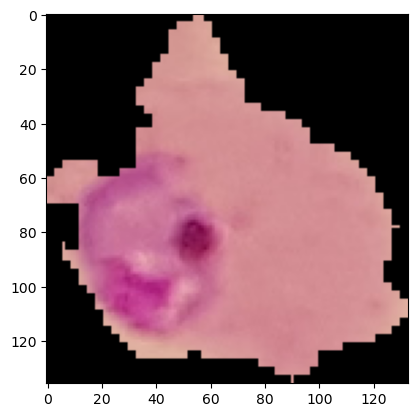

In [29]:
para_image1 = test_path+'parasitized\\'+para_image
para = imread(para_image1)
plt.imshow(para);

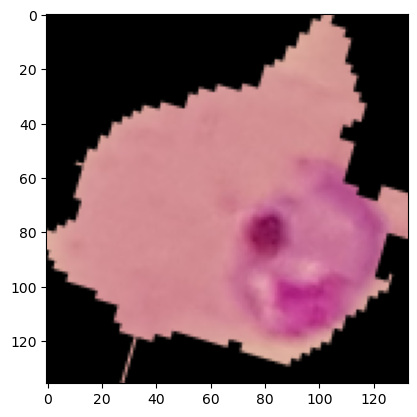

In [30]:
plt.imshow(image_gen.random_transform(para));

In [31]:
train_path

'C:\\Users\\m10sa\\Desktop\\cell_images\\train\\'

In [32]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [33]:
os.listdir(train_path)    

['parasitized', 'uninfected']

In [34]:
image_gen.flow_from_directory(test_path);

Found 2600 images belonging to 2 classes.


### Creating the CNN Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten   

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=1)  

In [41]:
batch_size = 16

In [42]:
image_shape[:2]

(130, 130)

In [43]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', 
                                                class_mode='binary', batch_size=batch_size)

Found 24958 images belonging to 2 classes.


In [44]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', 
                                                class_mode='binary', batch_size=batch_size, shuffle=False)

Found 2600 images belonging to 2 classes.


In [45]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [46]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [47]:
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])
results

Epoch 1/20


1560/1560 [==============================] - 172s 109ms/step - loss: 0.8527 - accuracy: 0.5503 - val_loss: 0.6818 - val_accuracy: 0.5619
Epoch 2/20
1560/1560 [==============================] - 170s 109ms/step - loss: 0.6780 - accuracy: 0.5806 - val_loss: 0.6753 - val_accuracy: 0.5854
Epoch 3/20
1560/1560 [==============================] - 168s 107ms/step - loss: 0.6738 - accuracy: 0.5886 - val_loss: 0.6715 - val_accuracy: 0.5742
Epoch 4/20
1560/1560 [==============================] - 174s 111ms/step - loss: 0.6650 - accuracy: 0.6044 - val_loss: 0.6652 - val_accuracy: 0.5869
Epoch 5/20
1560/1560 [==============================] - 174s 112ms/step - loss: 0.4680 - accuracy: 0.7689 - val_loss: 0.2360 - val_accuracy: 0.9304
Epoch 6/20
1560/1560 [==============================] - 174s 111ms/step - loss: 0.2300 - accuracy: 0.9282 - val_loss: 0.2188 - val_accuracy: 0.9319
Epoch 7/20
1560/1560 [==============================] - 175s 112ms/step - loss: 0.2104 - accuracy: 0.9343 - va

In [48]:
from tensorflow.keras.models import load_model
model.save('my_malaria_detector_model.h5')

C:\Users\m10sa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [51]:
metrics_output = pd.DataFrame(model.history.history)
metrics_output

,loss,accuracy,val_loss,val_accuracy
0,0.852684,0.550325,0.681835,0.561923
1,0.678002,0.580615,0.675328,0.585385
2,0.673834,0.588629,0.671480,0.574231
3,0.665042,0.604415,0.665221,0.586923
4,0.467965,0.768932,0.236031,0.930385
5,0.230011,0.928199,0.218799,0.931923
6,0.210446,0.934290,0.286986,0.923077


In [52]:
model.evaluate(test_image_gen)

163/163 [==============================] - 12s 76ms/step - loss: 0.2754 - accuracy: 0.9277


[0.2753605842590332, 0.9276922941207886]

In [53]:
model.metrics_names

['loss', 'accuracy']

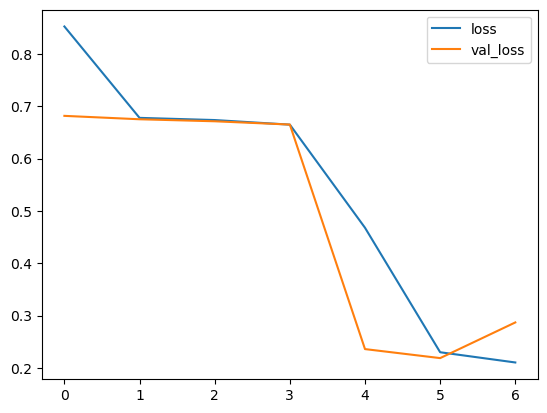

In [54]:
losses = metrics_output[['loss','val_loss']]
losses.plot();

In [55]:
model.evaluate(test_image_gen)

163/163 [==============================] - 13s 77ms/step - loss: 0.2674 - accuracy: 0.9312


[0.26739680767059326, 0.9311538338661194]

In [56]:
pred_proba = model.predict(test_image_gen)
pred_proba

163/163 [==============================] - 12s 73ms/step


array([[6.1763356e-05],
       [7.7881508e-05],
       [1.1251056e-04],
       ...,
       [9.9543166e-01],
       [9.8021626e-01],
       [9.9878722e-01]], dtype=float32)

In [57]:
len(pred_proba)

2600

In [58]:
threshold = 0.5
predictions = np.where(pred_proba>threshold, 1, 0)
predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [61]:
print("\033[1m"+classification_report(y_test, predictions)+"\033[0;0m")

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1300
           1       0.89      0.97      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



In [62]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

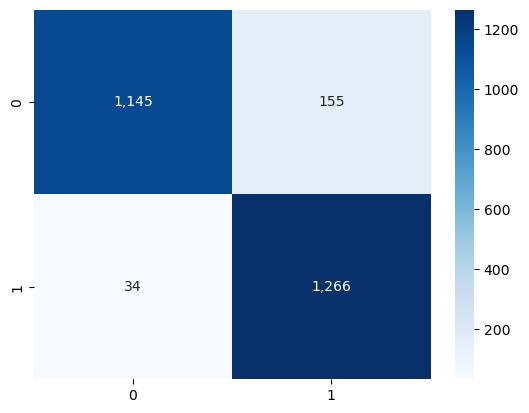

In [63]:
sns.heatmap(confusion_matrix(y_test, predictions), cmap='Blues', annot=True, fmt=',d');  

In [64]:
para_cell

'C:\\Users\\m10sa\\Desktop\\cell_images\\train\\parasitized\\C33P1thinF_IMG_20150619_114756a_cell_179.png'

In [65]:
from tensorflow.keras.preprocessing import image

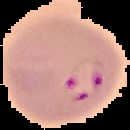

In [66]:
my_image = image.load_img(para_cell, target_size=image_shape)
my_image

In [67]:
type(my_image)

PIL.Image.Image

In [68]:
my_image_arr = image.img_to_array(my_image)
my_image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [69]:
my_image_arr.shape

(130, 130, 3)

In [70]:
my_image_arr = my_image_arr.reshape(1,130,130,3)
my_image_arr

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [71]:
pred = model.predict(my_image_arr)
pred

1/1 [==============================] - 0s 80ms/step


array([[3.463213e-08]], dtype=float32)

In [72]:
np.round(pred)

array([[0.]], dtype=float32)